## Evaluasi

Confussion matrix dan Nilai akurasi, presisi, recall, serta f1-score pada masing- masing kernel

In [1]:
import pandas as pd

df = pd.read_csv('Data/CleanDatasetStopwordStemmer.csv', header=0, names=['ID','label','tweet'])
df.head()

,ID,label,tweet
0,1,terlambat,posindonesia kau sungguh sangat lot sekali cum...
1,2,terlambat,min resi sampai kapan yah koo lama bgt ga sampaj
2,3,terlambat,blm pernah pake next day telat minggu koq pali...
3,4,terlambat,barang ambil aja gak takut lama klu anter gpp ...
4,5,terlambat,paket no blm jg padahal pake pos express udah ...


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
#SVM
from sklearn import svm
from sklearn.svm import LinearSVC
import time

## Kernel Linear

-----average accuracy-----
89.1891891892
------kategori,jumlah-----
0    45
1    40
5    35
4    34
3    34
2    34
Name: label, dtype: int64
------Confusion matrix-----
label   0   1   2   3   4   5
row_0                        
0      38   1   0   0   0   0
1       2  33   0   1   0   0
2       0   1  34   0   0   0
3       0   3   0  31   1   0
4       5   1   0   2  31   4
5       0   1   0   0   2  31


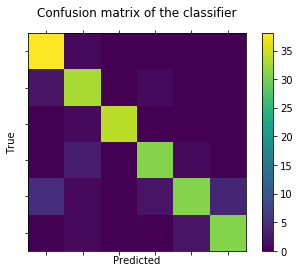

-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----
             precision    recall  f1-score   support

    class 0       0.97      0.84      0.90        45
    class 1       0.92      0.82      0.87        40
    class 2       0.97      1.00      0.99        34
    class 3       0.89      0.91      0.90        34
    class 4       0.72      0.91      0.81        34
    class 5       0.91      0.89      0.90        35

avg / total       0.90      0.89      0.89       222

------Running Time-----
--- 1.87199997902 seconds ---


In [8]:
start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)

x_traincv=cv.fit_transform(x_train)
z=x_traincv.toarray()

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_
cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 

# Kernel Polinomial
metode = svm.SVC(kernel='linear', C=1) 

y_train=y_train.astype('int')

metode.fit(x_traincv1,y_train)

x_testcv1=cv1.transform(x_test)
pred=metode.predict(x_testcv1)

actu=np.array(y_test).astype(None)
count=0

for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1

count

len(actu)

akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

print("------kategori,jumlah-----")
print(y_test.value_counts())
print("------Confusion matrix-----")
cnf_matrix = pd.crosstab(pred,y_test, )
print(cnf_matrix)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# menghitung akurasi
print("-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
print(classification_report(actu, pred, target_names=target_names))

# mengitung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))

## Kernel Polynomial

-----average accuracy-----
77.027027027
------kategori,jumlah-----
0    45
1    40
5    35
4    34
3    34
2    34
Name: label, dtype: int64
------Confusion matrix-----
col_0   0   1   2   3   4   5
label                        
0      32   3   0   1   8   1
1       0  27   1   7   4   1
2       0   2  25   2   5   0
3       1   1   0  27   5   0
4       0   0   0   0  34   0
5       0   1   0   0   8  26


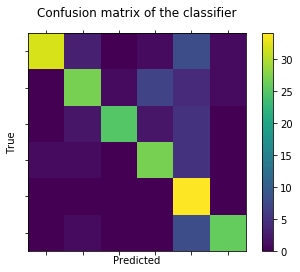

-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----
             precision    recall  f1-score   support

    class 0       0.97      0.71      0.82        45
    class 1       0.79      0.68      0.73        40
    class 2       0.96      0.74      0.83        34
    class 3       0.73      0.79      0.76        34
    class 4       0.53      1.00      0.69        34
    class 5       0.93      0.74      0.83        35

avg / total       0.83      0.77      0.78       222

------Running Time-----
--- 4.47100019455 seconds ---


In [3]:
start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)

x_traincv=cv.fit_transform(x_train)
z=x_traincv.toarray()

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_
cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 

# Kernel Polinomial
metode = svm.SVC(kernel='poly', C=1, gamma=5) 

y_train=y_train.astype('int')

metode.fit(x_traincv1,y_train)

x_testcv1=cv1.transform(x_test)
pred=metode.predict(x_testcv1)

actu=np.array(y_test).astype(None)
count=0

for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1
count

#predictions_rf = pd.DataFrame(df_y, columns=['y_preds']).to_csv('prediction_try.csv')

len(actu)

akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

print("------kategori,jumlah-----")
print(y_test.value_counts())
print("------Confusion matrix-----")
cnf_matrix = pd.crosstab(y_test, pred)
print(cnf_matrix)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# menghitung akurasi
print("-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
print(classification_report(actu, pred, target_names=target_names))

hasil = pd.DataFrame(df_y, columns=['id','tweet','kategori']).to_csv("Hasil-%s.csv" % count)
# mengitung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))

## Kernel RBF

-----average accuracy-----
87.8378378378
------kategori,jumlah-----
0    45
1    40
5    35
4    34
3    34
2    34
Name: label, dtype: int64
------Confusion matrix-----
col_0   0   1   2   3   4   5
label                        
0      38   2   0   0   5   0
1       2  31   1   3   2   1
2       0   1  33   0   0   0
3       0   1   0  30   3   0
4       0   0   0   0  32   2
5       0   0   0   0   4  31


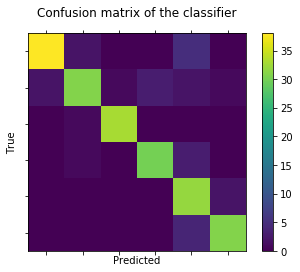

-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----
             precision    recall  f1-score   support

    class 0       0.95      0.84      0.89        45
    class 1       0.89      0.78      0.83        40
    class 2       0.97      0.97      0.97        34
    class 3       0.91      0.88      0.90        34
    class 4       0.70      0.94      0.80        34
    class 5       0.91      0.89      0.90        35

avg / total       0.89      0.88      0.88       222

------Running Time-----
--- 6.3220000267 seconds ---


In [19]:
start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)

x_traincv=cv.fit_transform(x_train)
z=x_traincv.toarray()

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_
cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 

# Kernel RBF
metode = svm.SVC(kernel='rbf', C=10, gamma=1) 

y_train=y_train.astype('int')

metode.fit(x_traincv1,y_train)

x_testcv1=cv1.transform(x_test)
pred=metode.predict(x_testcv1)

actu=np.array(y_test).astype(None)
count=0

for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1

count

len(actu)

akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

# display confusion_matrix
# print(metrics.accuracy_score(y_test, pred))
print("------kategori,jumlah-----")
print(y_test.value_counts())
print("------Confusion matrix-----")
cnf_matrix = pd.crosstab(y_test, pred)
print(cnf_matrix)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# menghitung akurasi
print("-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
print(classification_report(actu, pred, target_names=target_names))

# mengitung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))